## Solar Power Prediction using Linear Regression Algorithm

## Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('Datasets\solar_power_generation.csv')
data

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


In [3]:
# First 10 rows
data.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [4]:
# Last 10 rows
data.tail(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4203,11.54,54,1023.9,0.0,0.0,6.6,22,0,0,339.09,...,179.06,25.20,180.00,22.33,178.15,31.32,49.353298,77.504836,223.76691,88.522500
4204,3.13,94,1025.9,0.0,0.0,44.0,33,44,0,0.00,...,216.16,17.08,235.30,15.38,212.57,29.52,72.200776,92.520489,118.46938,14.523889
4205,0.73,99,1027.3,0.0,0.0,36.0,13,36,0,2.67,...,244.13,19.20,263.54,14.08,237.53,21.96,58.634855,83.222229,128.50129,129.439170
4206,5.01,78,1027.4,0.0,0.0,100.0,22,35,100,110.36,...,260.13,14.78,267.21,7.52,253.30,12.24,45.308666,75.151027,139.82631,389.736670
4207,7.51,72,1026.0,0.0,0.0,100.0,100,67,100,137.06,...,298.30,12.88,296.57,11.27,296.57,11.88,32.781365,68.857259,152.71076,523.156940
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [5]:
# Dimensions of the dataset
data.shape

(4213, 21)

In [6]:
# Statistical summary
data.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [7]:
# Check information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [8]:
# Check for the missing values
data.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [9]:
# Check for duplicate data
data.duplicated().sum()

np.int64(0)

In [10]:
# All the columns
data.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

## Exploratory Data Analysis

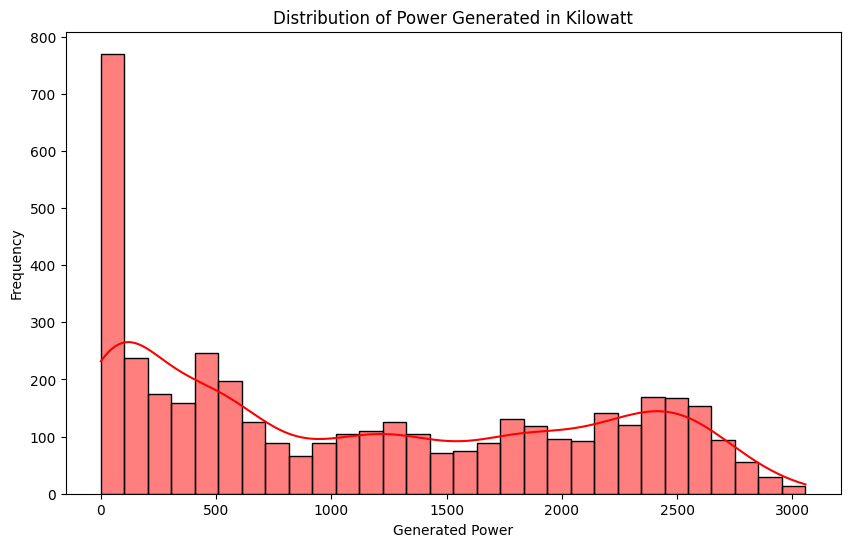

In [12]:
# Plot distribution of 'generated_power_kw' 
plt.figure(figsize=(10, 6))
plt.title('Distribution of Power Generated in Kilowatt')
sns.histplot(data['generated_power_kw'], bins=30, kde=True, color='red')
plt.xlabel('Generated Power')
plt.ylabel('Frequency')
plt.show()

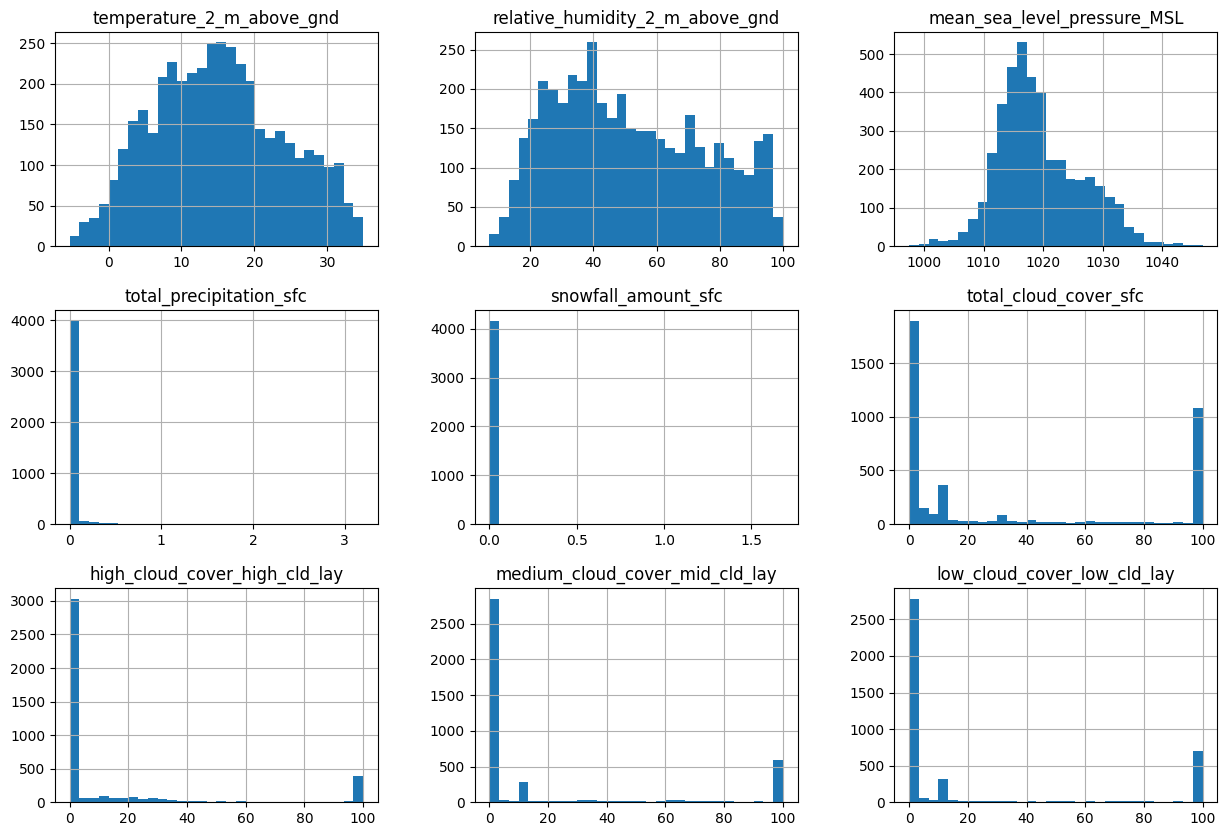

In [13]:
# Generate histogram plots
data[data.columns[0: 9]].hist(bins=30, figsize=(15, 10))
plt.show()

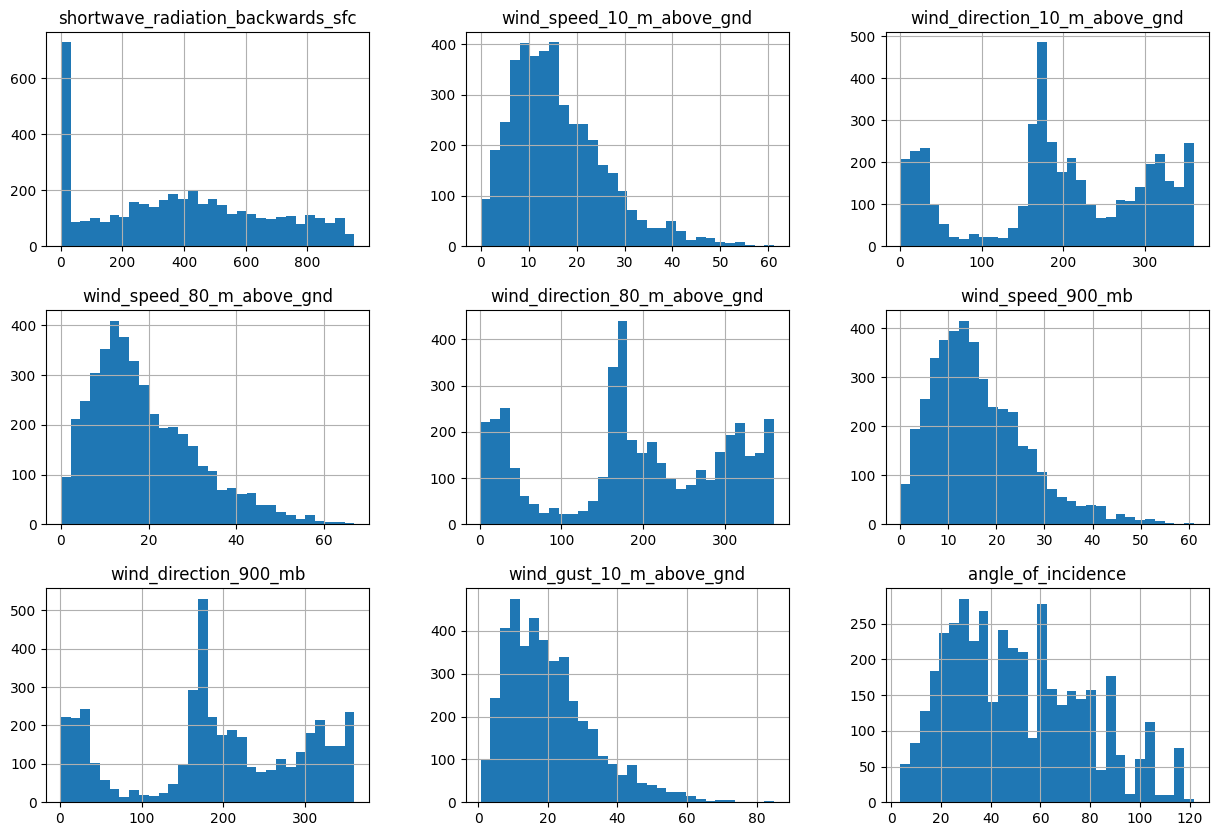

In [14]:
# Generate histogram plots
data[data.columns[9: 18]].hist(bins=30, figsize=(15, 10))
plt.show()

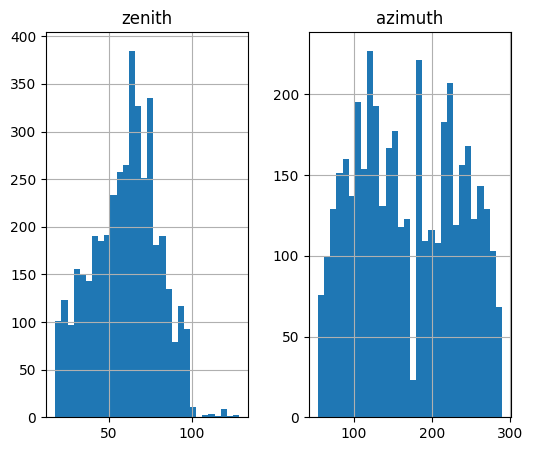

In [15]:
# Generate histogram plots
data[data.columns[18: 20]].hist(bins=30, figsize=(6, 5))
plt.show()

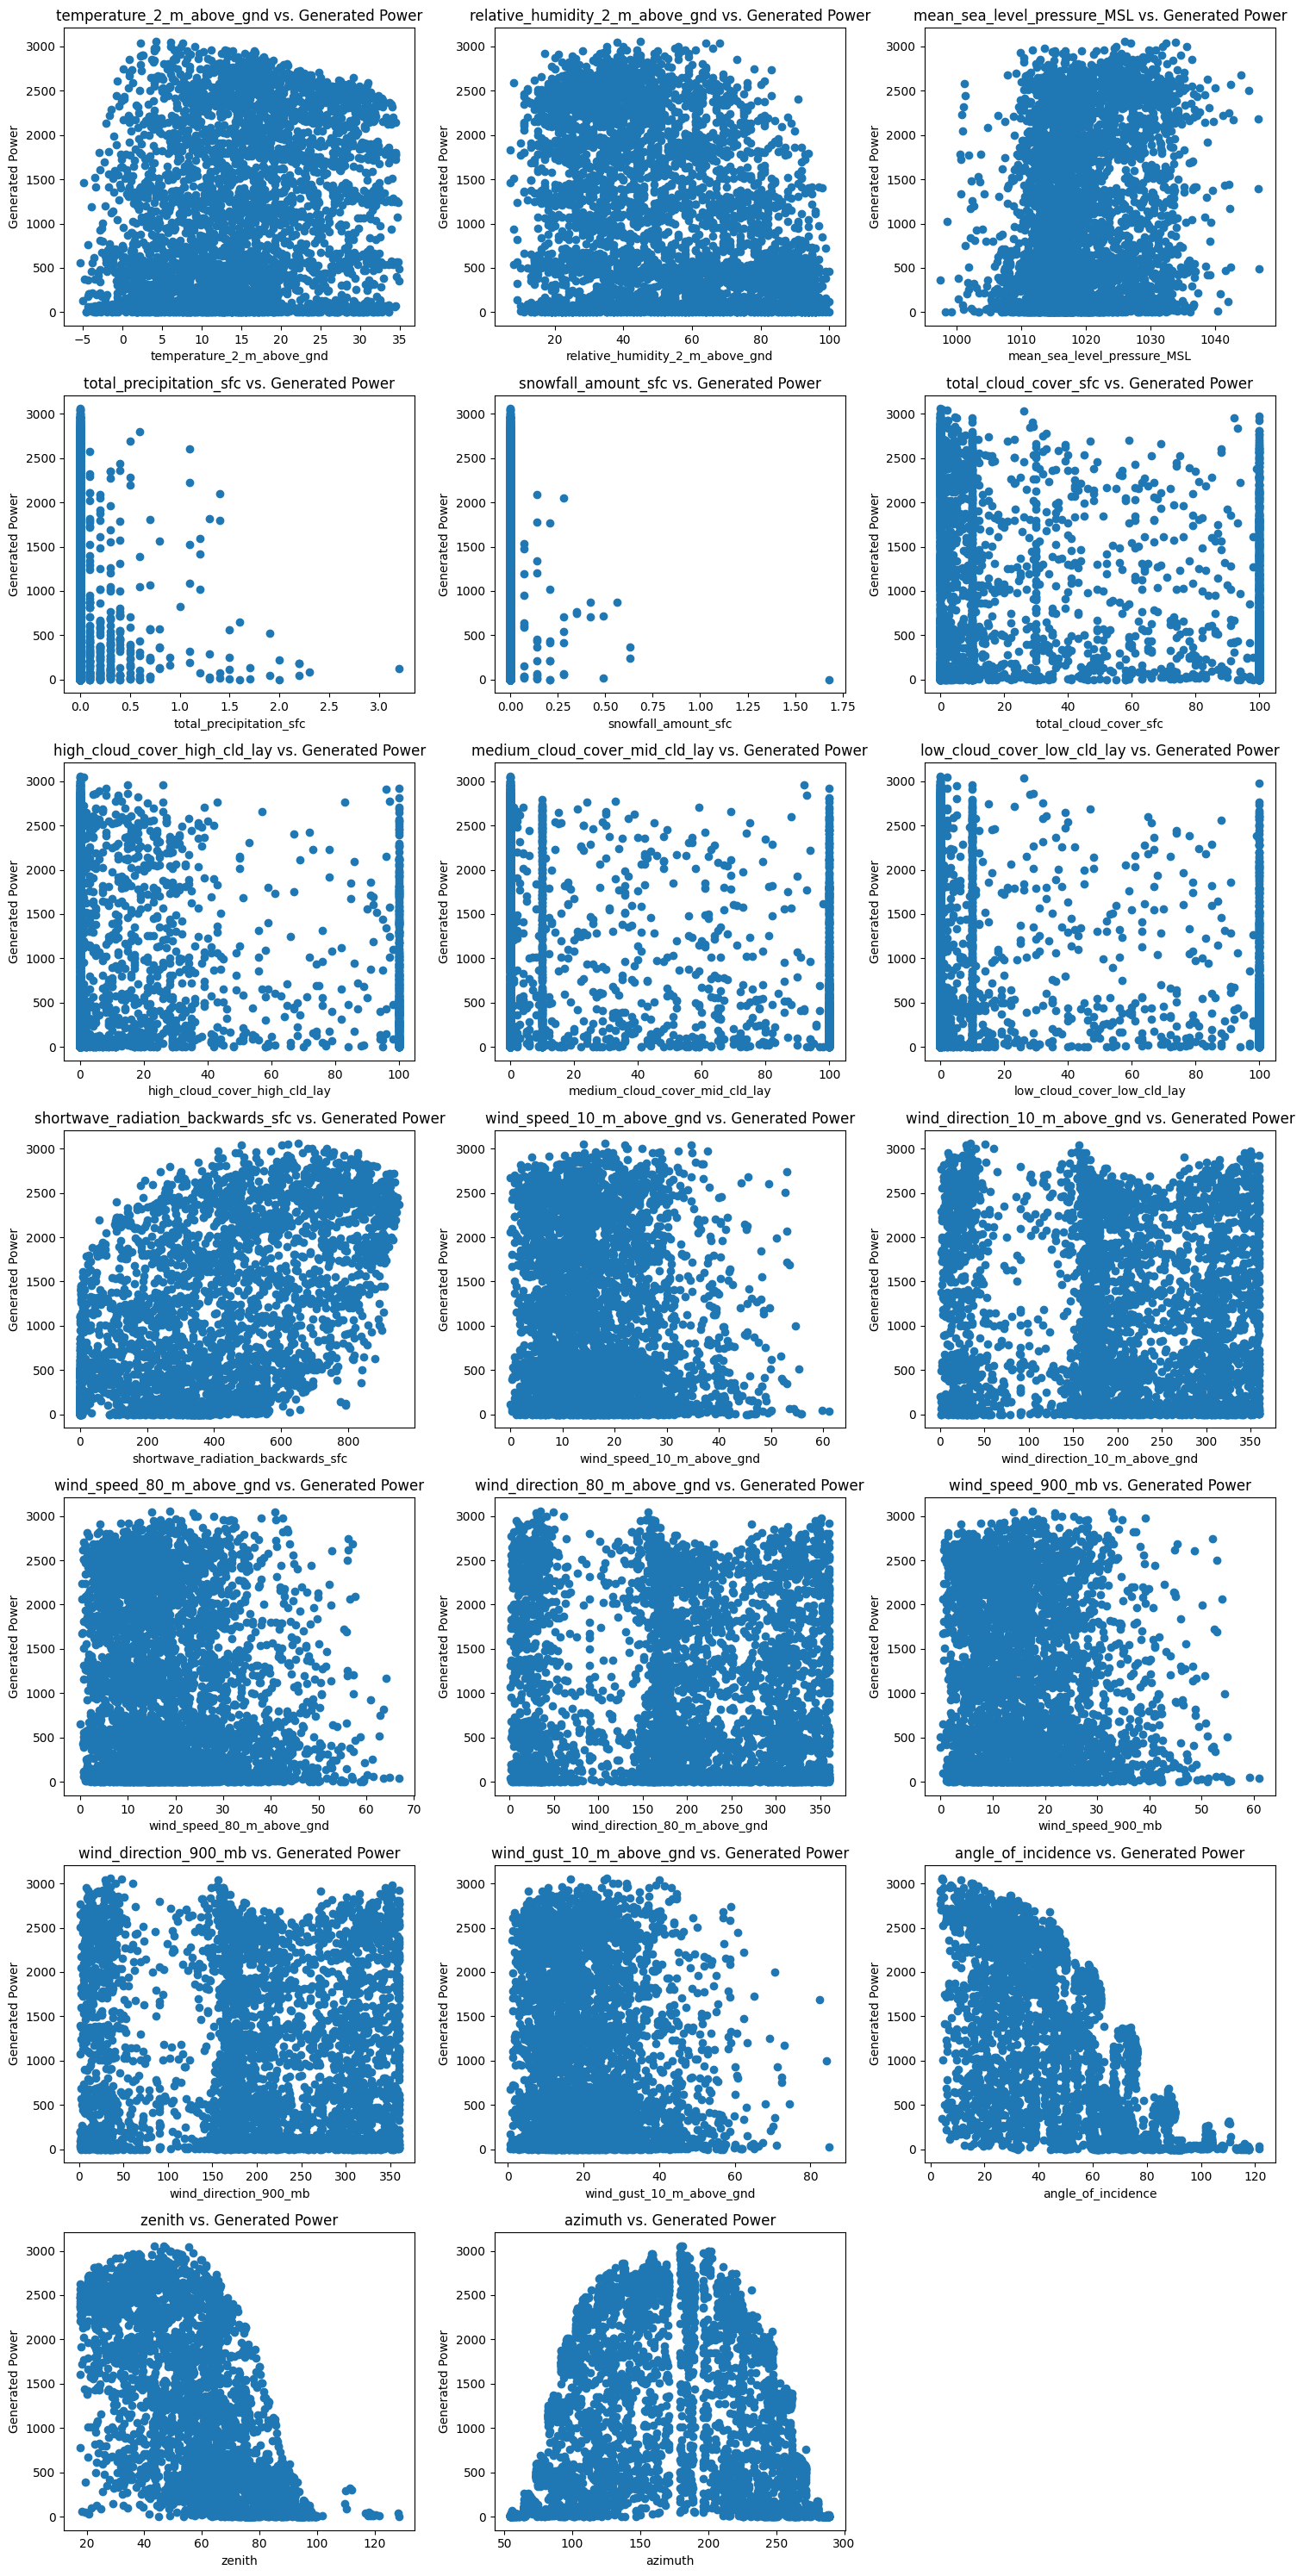

In [16]:
# Scatter plot with target feature
plt.figure(figsize=(15, 30))
for i, column in enumerate(data.columns):
    if column == 'generated_power_kw':
        continue
    plt.subplot(7, 3, i + 1)
    plt.scatter(data[column], data['generated_power_kw'])
    plt.title(f'{column} vs. Generated Power')
    plt.xlabel(column)
    plt.ylabel('Generated Power')
plt.tight_layout()
plt.show()

In [17]:
# Correlation
data.corr()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
temperature_2_m_above_gnd,1.000000,-0.771704,-0.402240,-0.083137,-0.121422,-0.326641,-0.019522,-0.100980,-0.381876,0.665755,...,0.051393,-0.244869,0.086630,-0.198107,0.043233,-0.188264,-0.090173,-0.545646,0.381797,0.217280
relative_humidity_2_m_above_gnd,-0.771704,1.000000,0.100529,0.168660,0.113987,0.402895,0.056452,0.135347,0.490402,-0.721754,...,0.008902,0.212868,-0.019408,0.135464,0.021068,0.144807,0.268460,0.513748,-0.525760,-0.336783
mean_sea_level_pressure_MSL,-0.402240,0.100529,1.000000,-0.159098,-0.053871,-0.151995,-0.014646,-0.129812,-0.162043,-0.188387,...,-0.119867,-0.131442,-0.161020,-0.145696,-0.125234,-0.189266,-0.075619,0.268111,-0.137872,0.150551
total_precipitation_sfc,-0.083137,0.168660,-0.159098,1.000000,0.184497,0.223678,0.076255,0.262367,0.282748,-0.130358,...,0.005234,0.052376,0.007131,0.044797,0.003216,0.066701,-0.020965,-0.023408,0.005749,-0.118442
snowfall_amount_sfc,-0.121422,0.113987,-0.053871,0.184497,1.000000,0.112646,-0.026356,0.042867,0.151609,-0.073499,...,0.039734,0.093156,0.041246,0.100405,0.041716,0.093060,-0.012497,0.033554,0.008426,-0.049508
total_cloud_cover_sfc,-0.326641,0.402895,-0.151995,0.223678,0.112646,1.000000,0.442865,0.712077,0.746225,-0.345089,...,0.055057,0.183732,0.039671,0.174510,0.057816,0.212142,-0.003426,0.136249,-0.037427,-0.334338
high_cloud_cover_high_cld_lay,-0.019522,0.056452,-0.014646,0.076255,-0.026356,0.442865,1.000000,0.593300,0.024703,-0.089620,...,0.017688,0.090049,0.018228,0.078204,0.020897,0.092842,-0.033840,0.031766,0.020790,-0.147723
medium_cloud_cover_mid_cld_lay,-0.100980,0.135347,-0.129812,0.262367,0.042867,0.712077,0.593300,1.000000,0.236716,-0.199843,...,0.016954,0.088972,0.021935,0.076192,0.017195,0.079627,-0.035511,0.046719,0.014802,-0.227834
low_cloud_cover_low_cld_lay,-0.381876,0.490402,-0.162043,0.282748,0.151609,0.746225,0.024703,0.236716,1.000000,-0.336751,...,0.040060,0.156204,0.021782,0.153578,0.039875,0.193846,0.013421,0.120854,-0.054328,-0.288066
shortwave_radiation_backwards_sfc,0.665755,-0.721754,-0.188387,-0.130358,-0.073499,-0.345089,-0.089620,-0.199843,-0.336751,1.000000,...,-0.076530,-0.077090,-0.051670,0.028929,-0.081545,0.017212,-0.576921,-0.801892,0.549296,0.556148


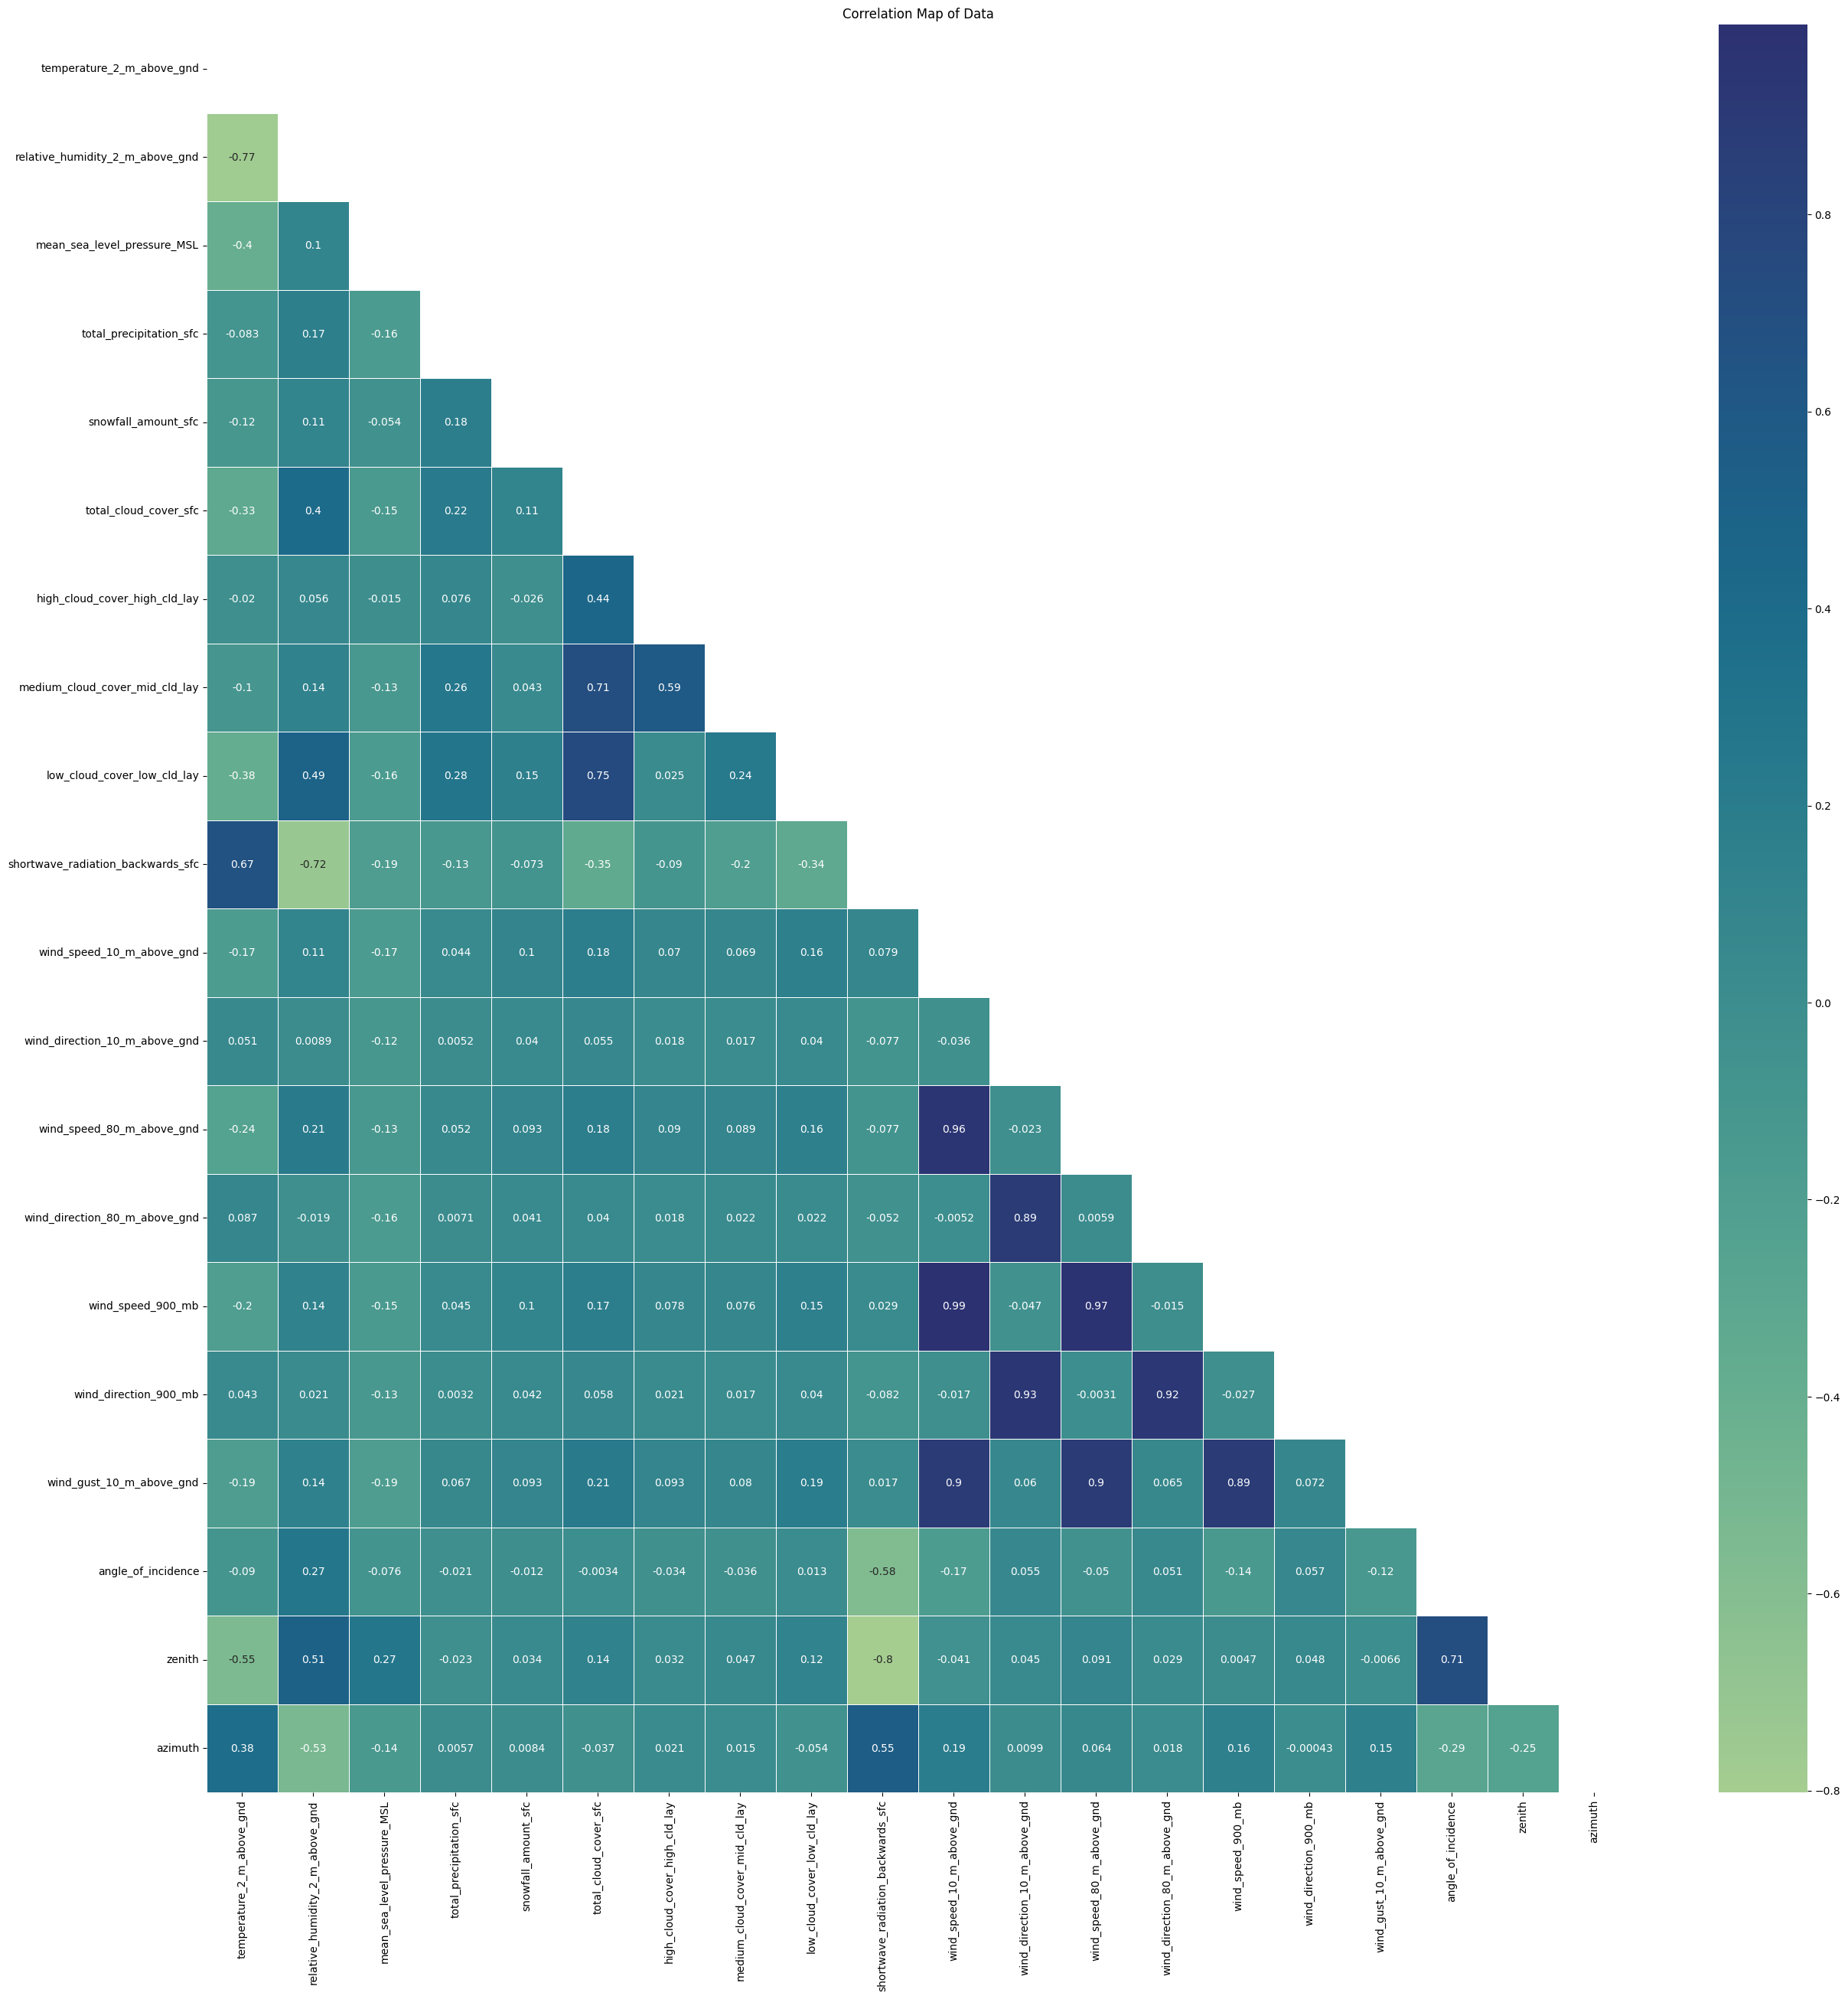

In [18]:
# Correlation map
plt.figure(figsize=(30, 30))
data_temp = data.drop('generated_power_kw', axis=1)
mask = np.triu(np.ones_like(data_temp.corr()))
sns.heatmap(data_temp.corr(), annot=True, cmap="crest", linewidth=.5, mask=mask)
plt.title('Correlation Map of Data')
plt.show()

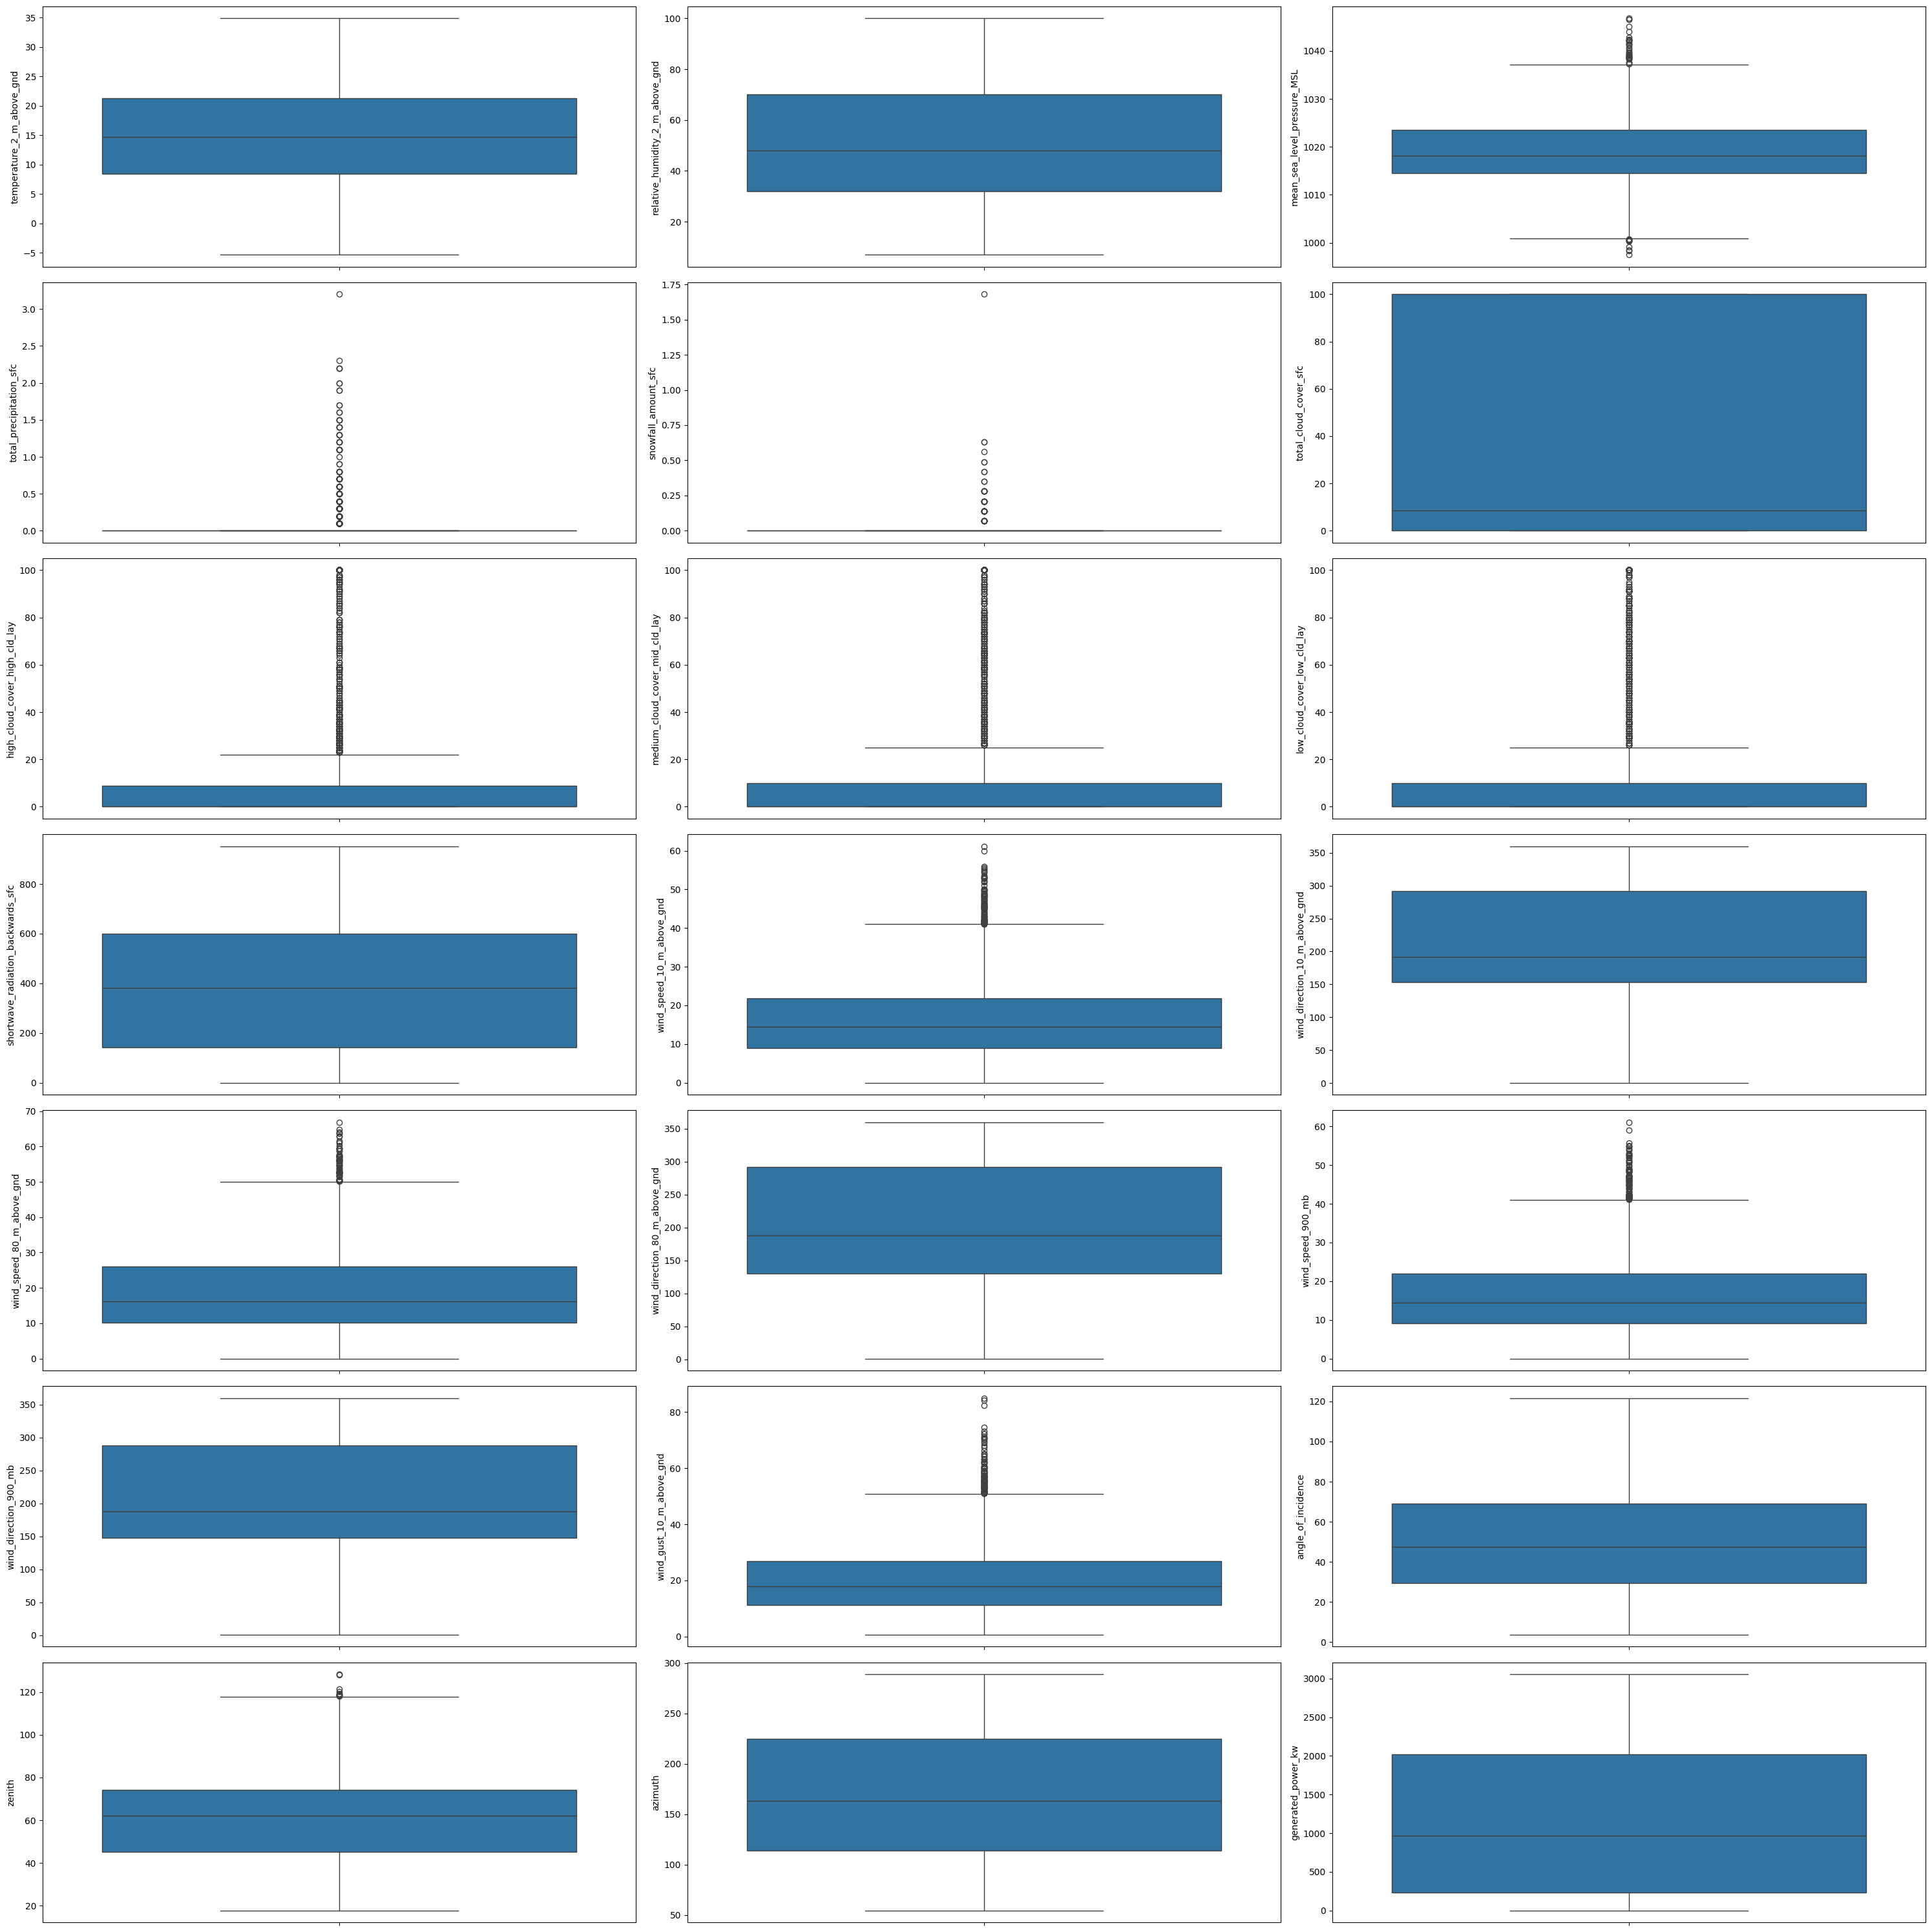

In [19]:
# Identify outliers
plt.figure(figsize=(30, 30))
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(data[column])
plt.tight_layout()
plt.show()

## Model Implementation

In [20]:
# Import modules for Machine Learning model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [21]:
# Split the dataset into features and target variables
x = data.drop('generated_power_kw', axis=1)
y = data['generated_power_kw']

In [22]:
# Features size
x.shape

(4213, 20)

In [23]:
# Target size
y.shape

(4213,)

In [24]:
# Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training dataset size: {x_train.shape, y_train.shape}")
print(f"Testing dataset size: {x_test.shape, y_test.shape}")

Training dataset size: ((3370, 20), (3370,))
Testing dataset size: ((843, 20), (843,))


In [25]:
# Perform standard scaling of data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
# Training the model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [27]:
# Predicting on testing data
y_pred = lr.predict(x_test_scaled)
mae = mean_absolute_error(y_pred, y_test)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 391.79269568403123


In [28]:
# Prediction on training data
y_pred_train = lr.predict(x_train_scaled)
mae_train = mean_absolute_error(y_pred_train, y_train)
print(f"Mean Absolute Error: {mae_train}")

Mean Absolute Error: 392.42118159774026


## Remove Columns with Multicollinearity

In [29]:
# Remove columns showing multicollinearity
cols_remove_list = ['medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay', 'wind_speed_80_m_above_gnd',
                    'wind_direction_80_m_above_gnd', 'wind_speed_900_mb', 'wind_direction_900_mb', 'wind_gust_10_m_above_gnd', 'zenith']
x_new = x.drop(cols_remove_list, axis=1)

In [30]:
# Columns left
x_new.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'angle_of_incidence', 'azimuth'],
      dtype='object')

In [32]:
# Split the data
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

In [33]:
# Perform scaling
scaler_new = StandardScaler()
x_new_sc_train = scaler_new.fit_transform(x_new_train)
x_new_sc_test = scaler_new.transform(x_new_test)

In [34]:
# Train the model
lr_new = LinearRegression()
lr_new.fit(x_new_sc_train, y_new_train)

LinearRegression()

In [35]:
# Evaluate model on testing data
y_new_pred = lr_new.predict(x_new_sc_test)
mae_new = mean_absolute_error(y_new_pred, y_test)
print(f"Mean Absolute Error: {mae_new}")

Mean Absolute Error: 394.6873630508799


In [36]:
# Evaluate model on training data
y_new_pred_train = lr_new.predict(x_new_sc_train)
mae_new_train = mean_absolute_error(y_new_pred_train, y_train)
print(f"Mean Absolute Error: {mae_new_train}")

Mean Absolute Error: 396.51709285622746


## Save the Model

In [37]:
# Pickle the model
import pickle
pickle_out = open('lr.pkl', 'wb')
pickle.dump(lr, pickle_out)
pickle_out.close()

In [38]:
# Pickle the scaler
pickle_out_scaler = open('sc.pkl', 'wb')
pickle.dump(scaler, pickle_out_scaler)
pickle_out_scaler.close()